In [1]:
import pandas as pd
import numpy as np

In [136]:
titanic = pd.read_csv('datasets/titanic/train.csv')

In [137]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## target class: survived!

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [87]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Let's try imputing vals to missing vals

In [138]:
## there are missing vals in age, cabin, embarked
missing_val_count_by_column = (titanic.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
### there are a few things that we can try in order to get rid of missing vals:
# impute a val
# drop col - if cols have a lot of missing vals
# drop row - if rows have a lot of missing vals (not recommended for test set in competition)

Age         177
Cabin       687
Embarked      2
dtype: int64


In [14]:
titanic['Cabin'].value_counts()
## what is cabin? does it matter?
# cabin number. Probably irrelevant if this is captures by fare and/or pclass
# test this with a label encoder

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
E101           3
              ..
E31            1
A7             1
C101           1
B78            1
B80            1
Name: Cabin, Length: 147, dtype: int64

In [15]:
titanic['Embarked'].value_counts()
# port of embarkment: C -Cherbourg, Q -Queenstown, S - Southampton

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [139]:
titanic[titanic['Embarked'].isnull()]
# the idea would be to impute here based on similarity to other rows based
# on cabin, fare?

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [142]:
titanic[titanic['Ticket'] == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [141]:
# Impute most common Embarked val: S
titanic.at[61, 'Embarked'] = 'S'
titanic.at[829, 'Embarked'] = 'S'

In [30]:
# let's labelencode cabin
from sklearn.preprocessing import LabelEncoder

In [93]:
le = LabelEncoder()

In [143]:
le.fit(titanic['Cabin'].astype(str))

LabelEncoder()

In [95]:
list(le.classes_)

['A10',
 'A14',
 'A16',
 'A19',
 'A20',
 'A23',
 'A24',
 'A26',
 'A31',
 'A32',
 'A34',
 'A36',
 'A5',
 'A6',
 'A7',
 'B101',
 'B102',
 'B18',
 'B19',
 'B20',
 'B22',
 'B28',
 'B3',
 'B30',
 'B35',
 'B37',
 'B38',
 'B39',
 'B4',
 'B41',
 'B42',
 'B49',
 'B5',
 'B50',
 'B51 B53 B55',
 'B57 B59 B63 B66',
 'B58 B60',
 'B69',
 'B71',
 'B73',
 'B77',
 'B78',
 'B79',
 'B80',
 'B82 B84',
 'B86',
 'B94',
 'B96 B98',
 'C101',
 'C103',
 'C104',
 'C106',
 'C110',
 'C111',
 'C118',
 'C123',
 'C124',
 'C125',
 'C126',
 'C128',
 'C148',
 'C2',
 'C22 C26',
 'C23 C25 C27',
 'C30',
 'C32',
 'C45',
 'C46',
 'C47',
 'C49',
 'C50',
 'C52',
 'C54',
 'C62 C64',
 'C65',
 'C68',
 'C7',
 'C70',
 'C78',
 'C82',
 'C83',
 'C85',
 'C86',
 'C87',
 'C90',
 'C91',
 'C92',
 'C93',
 'C95',
 'C99',
 'D',
 'D10 D12',
 'D11',
 'D15',
 'D17',
 'D19',
 'D20',
 'D21',
 'D26',
 'D28',
 'D30',
 'D33',
 'D35',
 'D36',
 'D37',
 'D45',
 'D46',
 'D47',
 'D48',
 'D49',
 'D50',
 'D56',
 'D6',
 'D7',
 'D9',
 'E10',
 'E101',
 'E12',
 

In [144]:
titanic['Cabin_encoded'] = le.transform(titanic['Cabin'].astype(str))

In [145]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,81
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,147
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,55
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,147


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

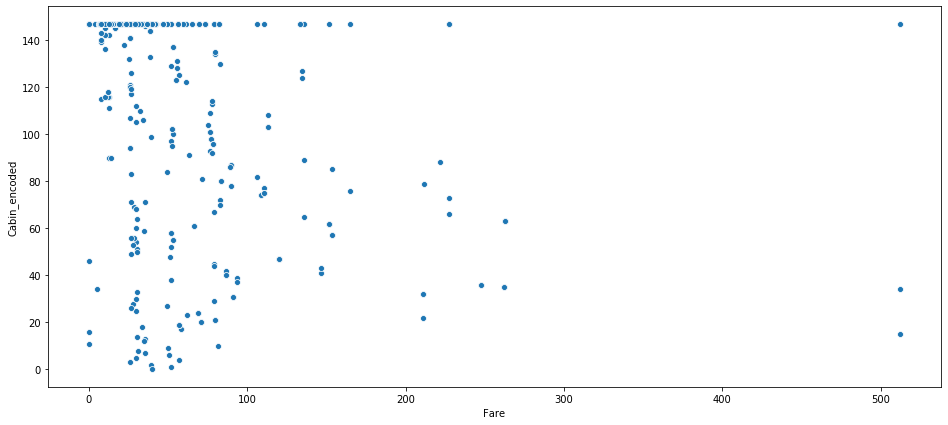

In [40]:
plt.figure(figsize=(16, 7))
sns.scatterplot(x='Fare', y='Cabin_encoded', data=titanic)
plt.show()
### y = 147: NaN

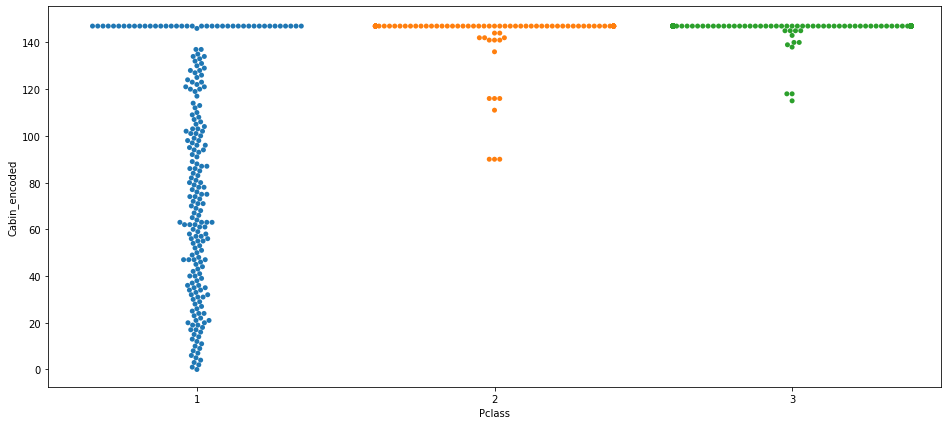

In [41]:
plt.figure(figsize=(16, 7))
sns.swarmplot(x='Pclass', y='Cabin_encoded', data=titanic)
plt.show()

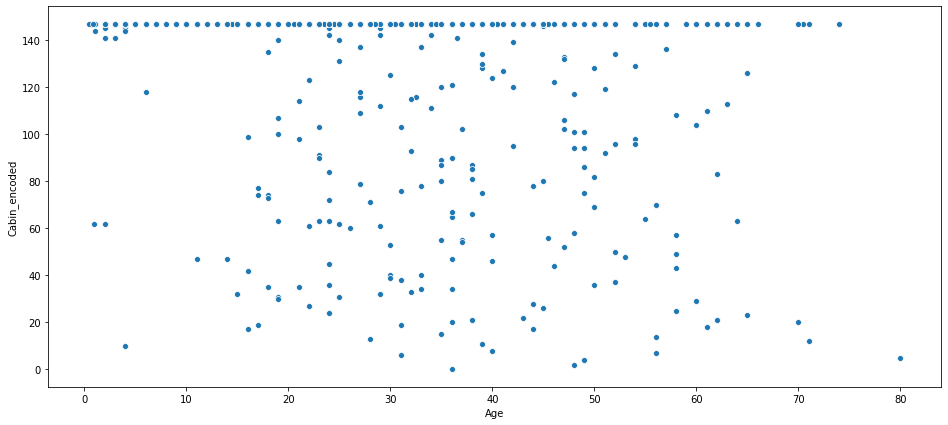

In [42]:
plt.figure(figsize=(16, 7))
sns.scatterplot(x='Age', y='Cabin_encoded', data=titanic)
plt.show()

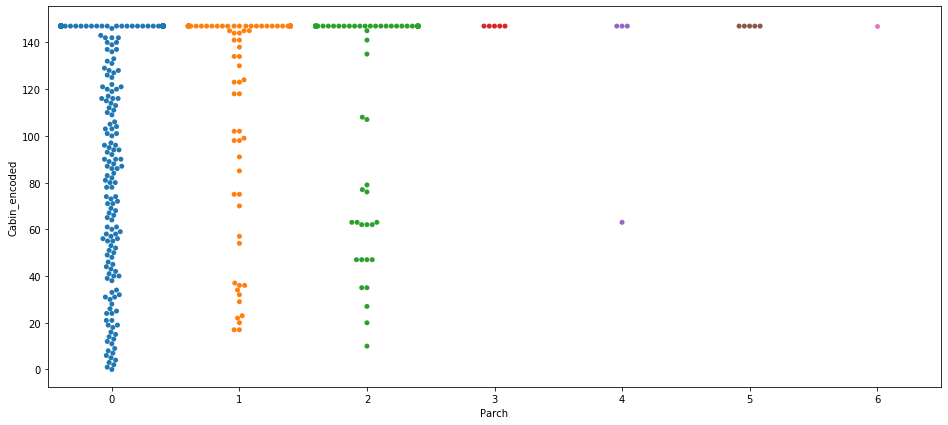

In [44]:
plt.figure(figsize=(16, 7))
sns.swarmplot(x='Parch', y='Cabin_encoded', data=titanic)
plt.show()

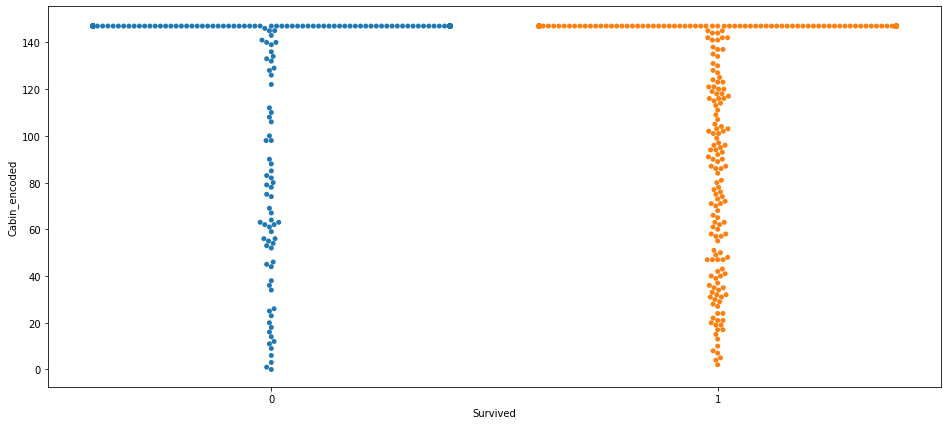

In [45]:
plt.figure(figsize=(16, 7))
sns.swarmplot(x='Survived', y='Cabin_encoded', data=titanic)
plt.show()

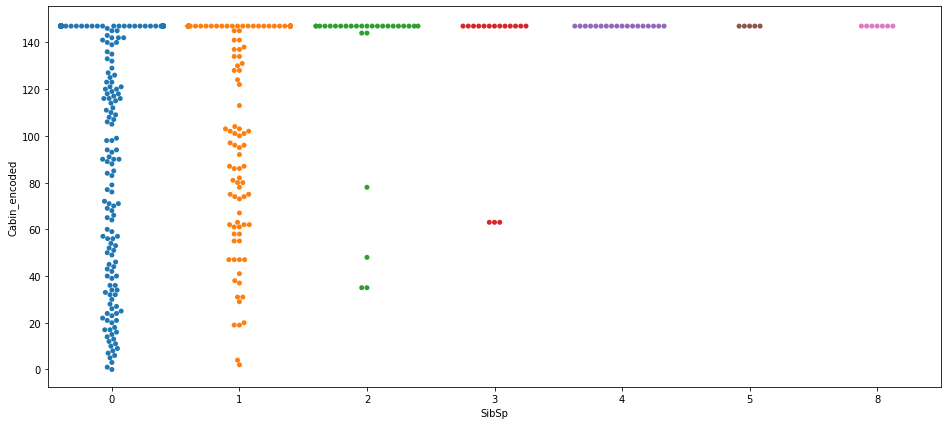

In [46]:
plt.figure(figsize=(16, 7))
sns.swarmplot(x='SibSp', y='Cabin_encoded', data=titanic)
plt.show()

In [146]:
missing_val_count_by_column = (titanic.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Age      177
Cabin    687
dtype: int64


In [49]:
## let's impute vals to age
## let's do the simplest method: the median!
from sklearn.impute import SimpleImputer

In [147]:
imputer = SimpleImputer(strategy='median')

In [148]:
imputer.fit(titanic['Age'].values.reshape(-1, 1))

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

##### *To do: try a better imputer: custom made or catboost

In [149]:
titanic['Age'] = imputer.transform(titanic['Age'].values.reshape(-1, 1))

In [150]:
missing_val_count_by_column = (titanic.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Cabin    687
dtype: int64


In [105]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,81
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,147
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,55
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,147


### More viz

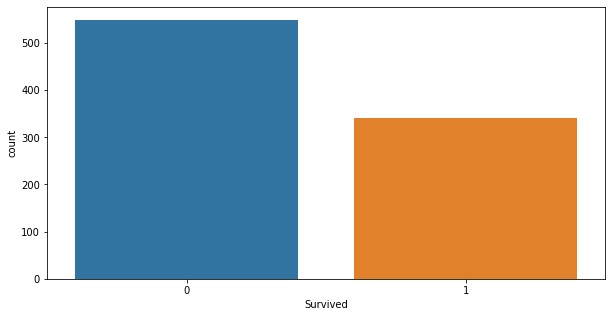

In [81]:
"""
    SURVIVED
"""
plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', data=titanic)
plt.show()

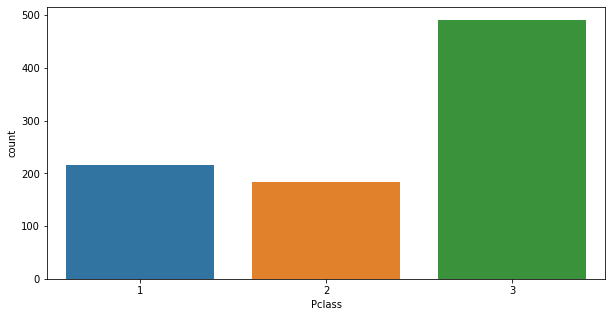

In [80]:
"""
    PCLASS
"""
plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', data=titanic)
plt.show()

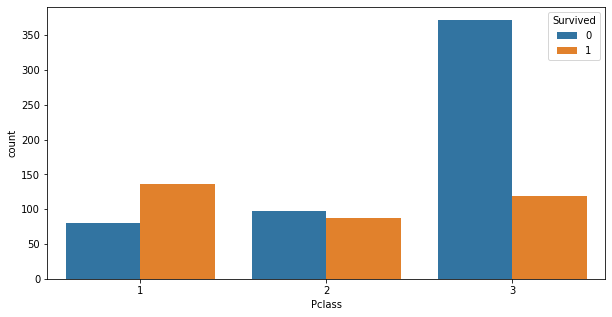

In [83]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.show()

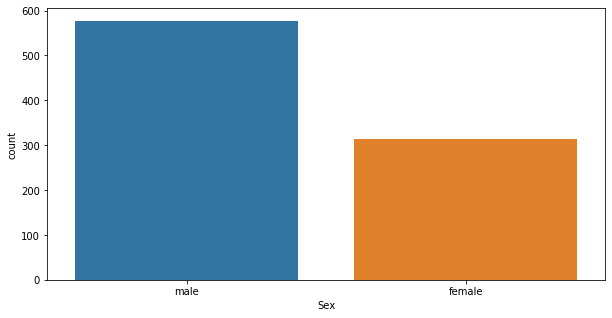

In [106]:
"""
    SEX
"""
plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', data=titanic)
plt.show()
### more men than women!

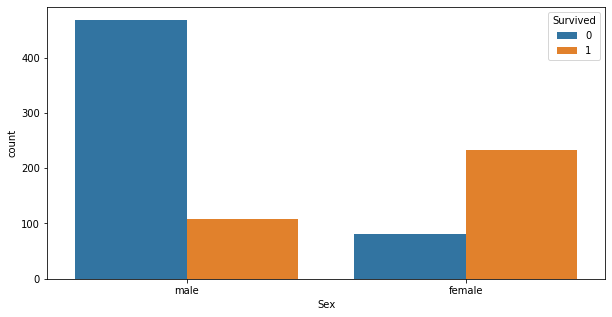

In [107]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.show()
## more women survived tho!

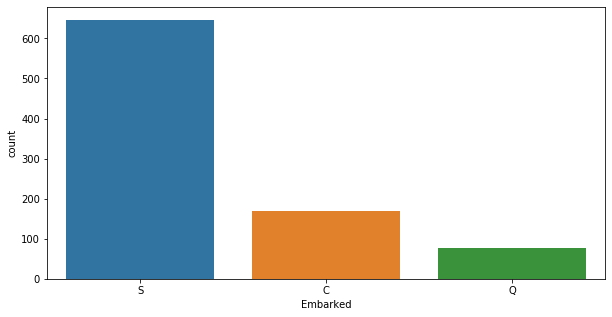

In [108]:
"""
    EMBARKED
"""
plt.figure(figsize=(10, 5))
sns.countplot(x='Embarked', data=titanic)
plt.show()
### most people boarded on southampton

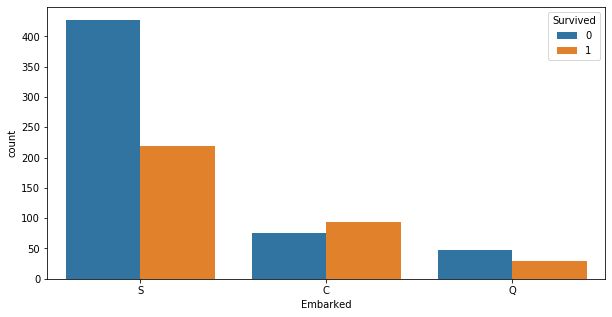

In [109]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Embarked', hue='Survived', data=titanic)
plt.show()

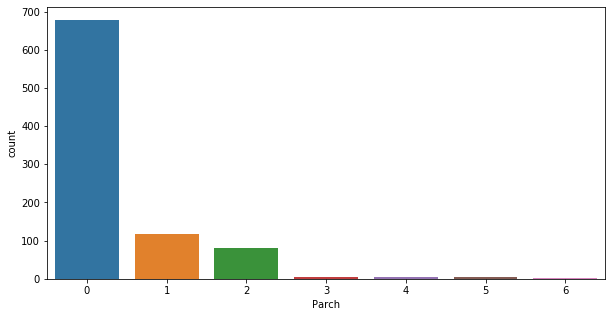

In [110]:
"""
    PARCH
"""
plt.figure(figsize=(10, 5))
sns.countplot(x='Parch', data=titanic)
plt.show()
### most people traveled without parents or children

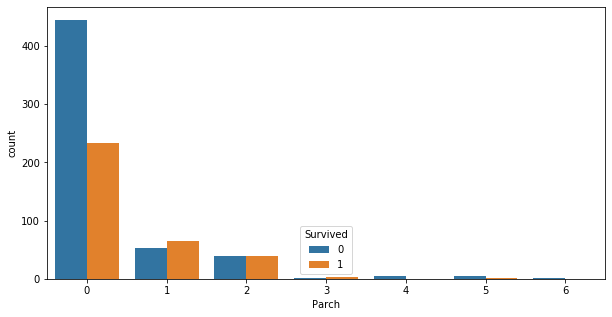

In [112]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Parch', hue='Survived', data=titanic)
plt.show()

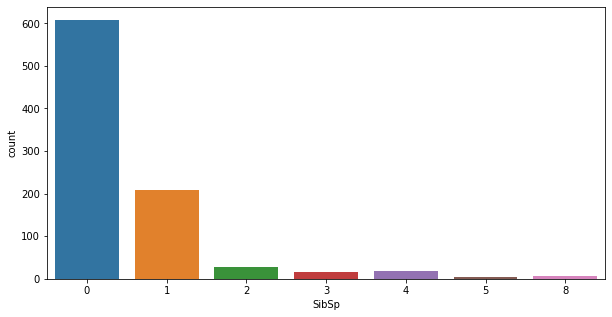

In [114]:
"""
    SIBSP
"""
plt.figure(figsize=(10, 5))
sns.countplot(x='SibSp', data=titanic)
plt.show()
## most people traveled without siblings or spouse

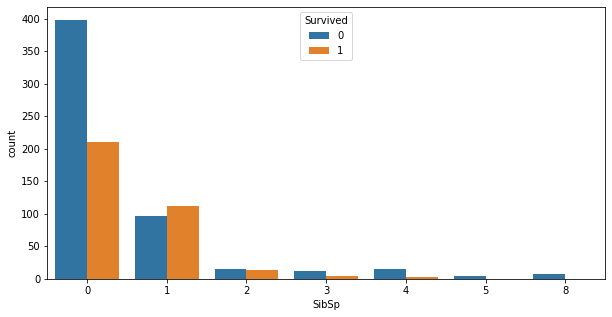

In [115]:
plt.figure(figsize=(10, 5))
sns.countplot(x='SibSp', hue='Survived', data=titanic)
plt.show()

<Figure size 720x360 with 0 Axes>

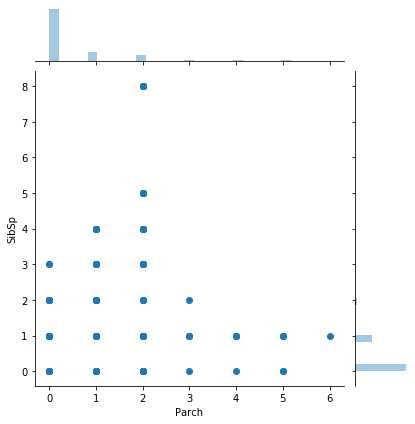

In [117]:
plt.figure(figsize=(10, 5))
sns.jointplot(x="Parch", y="SibSp", data=titanic);
plt.show()

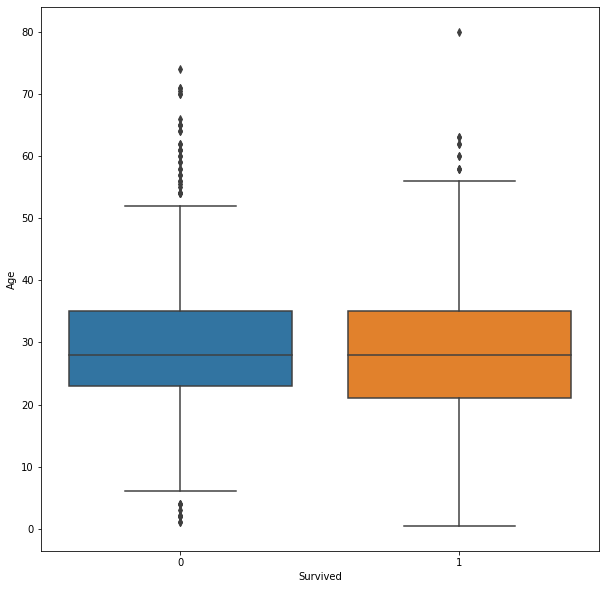

In [120]:
"""
    AGE
"""
plt.figure(figsize=(10, 10))
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.show()
## almost safe to say that if you were a child you would've survived

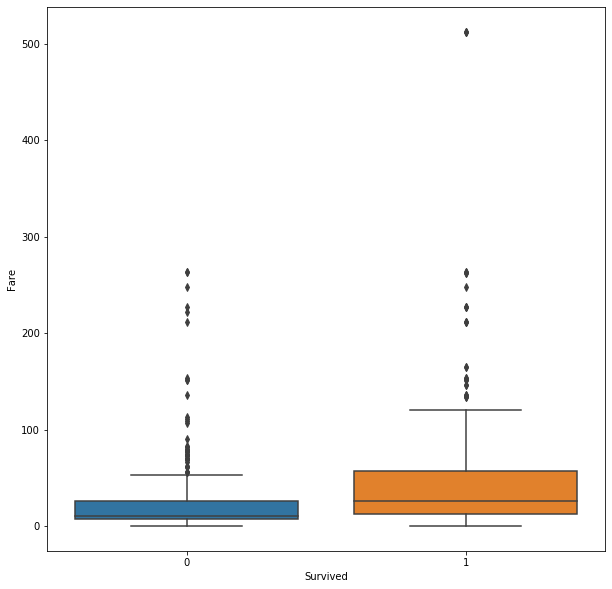

In [121]:
"""
    FARE
"""
plt.figure(figsize=(10, 10))
sns.boxplot(x='Survived', y='Fare', data=titanic)
plt.show()
### mean are different. Do a t-test for significance? Cant be done! Data isnt gaussian-like
### people who paid larger fares were more likely to survive

### Here we have finished visualizing and we're ready to drop cols

In [151]:
missing_val_count_by_column = (titanic.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Cabin    687
dtype: int64


In [152]:
#### cabin isn't too informative
## let's drop it too
unnecessary_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Cabin_encoded']

In [153]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,81
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,147
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,55
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,147


#### Let's drop "unnecessary" cols

In [154]:
#### cabin isn't too informative
## let's drop it too
unnecessary_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Cabin_encoded']
titanic.drop(unnecessary_cols, inplace=True, axis=1)

In [155]:
titanic = pd.get_dummies(titanic)
### why pclass isnt created dummies? cos it's not categorical :P

In [156]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


### Scaling num vars

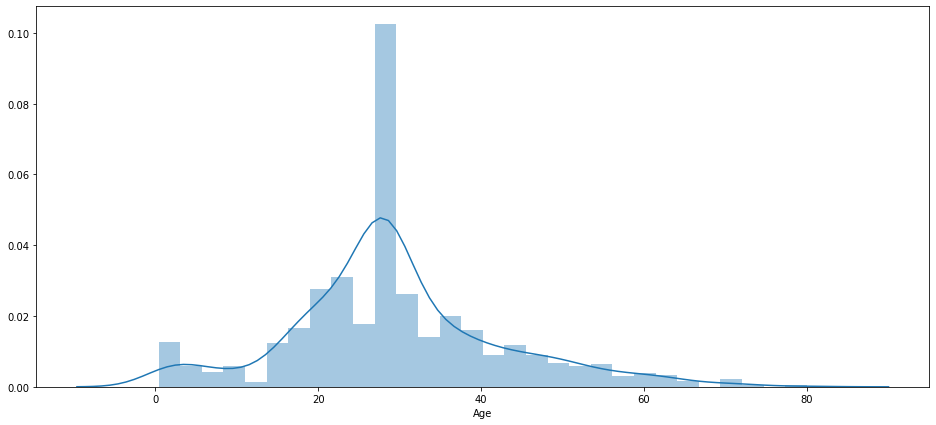

In [71]:
### how is age distributed?
plt.figure(figsize=(16, 7))
sns.distplot(titanic['Age'])
plt.show()

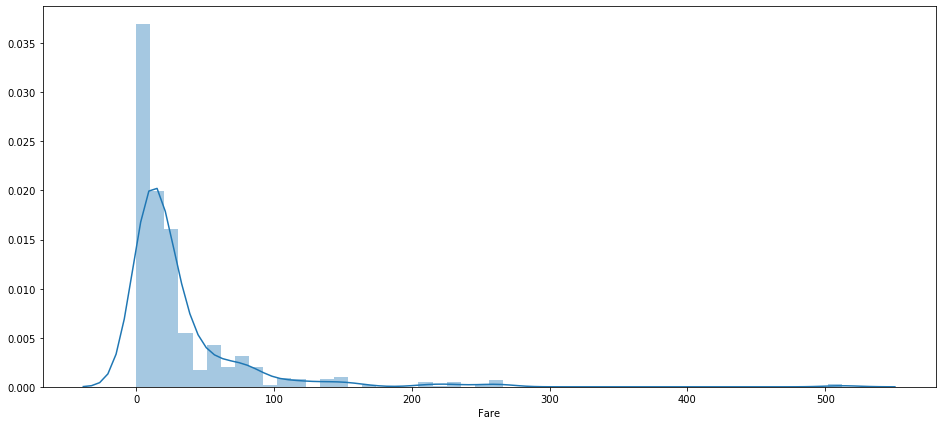

In [72]:
### what about fare?
plt.figure(figsize=(16, 7))
sns.distplot(titanic['Fare'])
plt.show()
#### right skewed

In [122]:
from sklearn.preprocessing import StandardScaler

In [129]:
ageSC = StandardScaler()

In [157]:
ageSC.fit(titanic['Age'].values.reshape(-1, 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [158]:
titanic['Age'] = ageSC.transform(titanic['Age'].values.reshape(-1, 1))

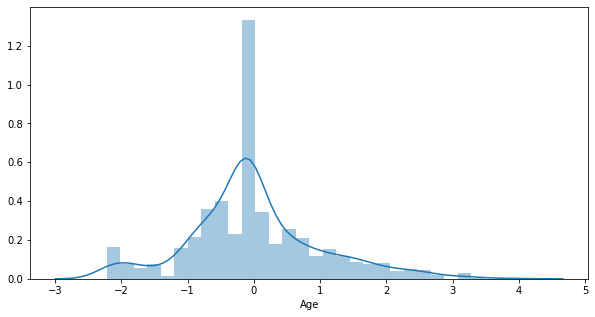

In [159]:
plt.figure(figsize=(10, 5))
sns.distplot(titanic['Age'])
plt.show()

### Age has lots of outliers. Perhaps another scaling strategy would be better?

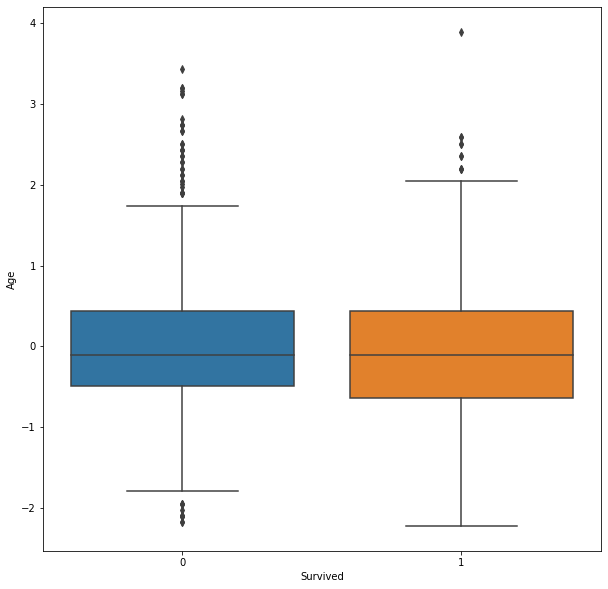

In [178]:
"""
    AGE
"""
plt.figure(figsize=(10, 10))
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.show()

#### Fare is right-skewed. Let's use something to make it more Gaussian-like!

In [135]:
from sklearn.preprocessing import PowerTransformer

In [167]:
titanic[titanic['Fare'] == 0]
### some people traveled for free?? then, no Box-Cox transform can be applied :-(

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
179,0,3,0.510161,0,0,0.0,0,1,0,0,1
263,0,1,0.817561,0,0,0.0,0,1,0,0,1
271,1,3,-0.335187,0,0,0.0,0,1,0,0,1
277,0,2,-0.104637,0,0,0.0,0,1,0,0,1
302,0,3,-0.796286,0,0,0.0,0,1,0,0,1
413,0,2,-0.104637,0,0,0.0,0,1,0,0,1
466,0,2,-0.104637,0,0,0.0,0,1,0,0,1
481,0,2,-0.104637,0,0,0.0,0,1,0,0,1
597,0,3,1.509209,0,0,0.0,0,1,0,0,1
633,0,1,-0.104637,0,0,0.0,0,1,0,0,1


In [168]:
ptFare = PowerTransformer()

In [169]:
ptFare.fit(titanic['Fare'].values.reshape(-1, 1))

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

In [170]:
titanic['Fare'] = ptFare.transform(titanic['Fare'].values.reshape(-1, 1))

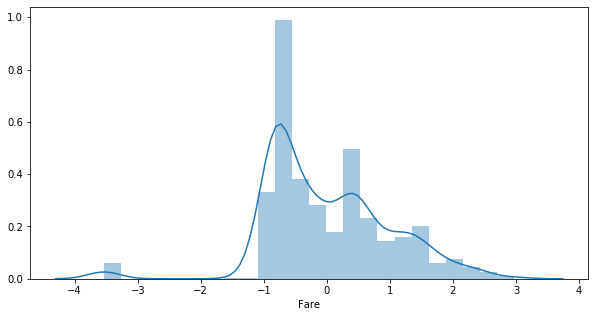

In [171]:
plt.figure(figsize=(10, 5))
sns.distplot(titanic['Fare'])
plt.show()
"""
is it more gaussian-like?? how does it compare vs target var?
"""

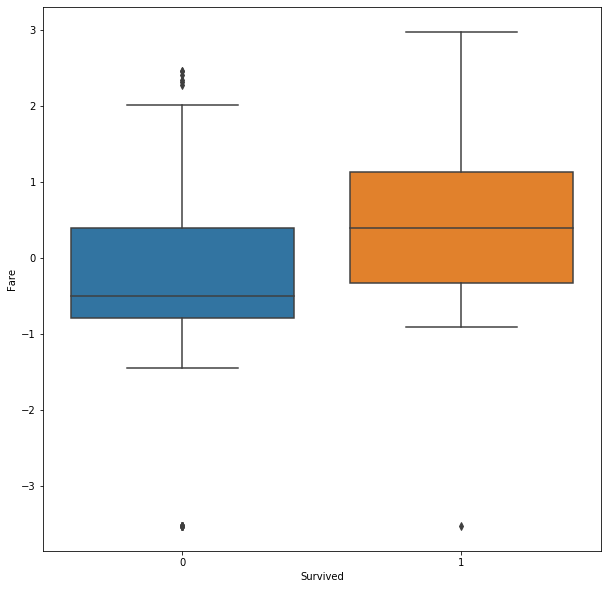

In [172]:
"""
    FARE
"""
plt.figure(figsize=(10, 10))
sns.boxplot(x='Survived', y='Fare', data=titanic)
plt.show()
"""
t-test now?
now it's more evident that both distros differ
there're less outliers
it's clearer that people that paid more had more
chances of survival
"""

In [173]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,-0.565736,1,0,-0.878820,0,1,0,0,1
1,1,1,0.663861,1,0,1.336651,1,0,1,0,0
2,1,3,-0.258337,0,0,-0.790065,1,0,0,0,1
3,1,1,0.433312,1,0,1.067352,1,0,0,0,1
4,0,3,0.433312,0,0,-0.774439,0,1,0,0,1


## Are we ready to model?

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [174]:
X = titanic.drop(['Survived'], axis=1, inplace=False)
y = titanic['Survived']

#### A small detour to do cross validation

In [192]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

In [194]:
kFold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
accs = []
f1s = []
for i, (train_idx, test_idx) in enumerate(kFold.split(X, y)):
    print("Fold:", i)
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    modelLR = LogisticRegression(random_state=0)
    modelLR.fit(X_train, y_train)
    preds = modelLR.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    print("Acc:", acc, "F1-score:", f1)
    accs.append(acc)
    f1s.append(f1)
    print()
print("Mean acc:", np.mean(accs))
print("Mean f1 score:", np.mean(f1s))

Fold: 0
Acc: 0.8222222222222222 F1-score: 0.7777777777777778

Fold: 1
Acc: 0.797752808988764 F1-score: 0.71875

Fold: 2
Acc: 0.8089887640449438 F1-score: 0.7605633802816901

Fold: 3
Acc: 0.8539325842696629 F1-score: 0.8059701492537314

Fold: 4
Acc: 0.7752808988764045 F1-score: 0.7142857142857144

Fold: 5
Acc: 0.7865168539325843 F1-score: 0.7164179104477613

Fold: 6
Acc: 0.7191011235955056 F1-score: 0.6268656716417911

Fold: 7
Acc: 0.8089887640449438 F1-score: 0.7301587301587301

Fold: 8
Acc: 0.7415730337078652 F1-score: 0.6349206349206349

Fold: 9
Acc: 0.7752808988764045 F1-score: 0.7142857142857143

Mean acc: 0.7889637952559301
Mean f1 score: 0.7199995683053545


In [177]:
from sklearn.model_selection import train_test_split

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Stuff to try:
### ROC curves
### Grid search
### XGBoost, NNs
### feature importance

### First impressions with classification. We will have a look to feature importance too

In [196]:
modelLR = LogisticRegression(random_state=0)
modelLR.fit(X_train, y_train)
preds = modelLR.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       168
           1       0.74      0.73      0.74       100

    accuracy                           0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268

[[143  25]
 [ 27  73]]


In [185]:
feature_importance = pd.DataFrame({'Feature': X.columns.tolist(), 'Coefficients': modelLR.coef_[0]})

In [186]:
feature_importance

,Feature,Coefficients
0,Pclass,-0.846205
1,Age,-0.513805
2,SibSp,-0.458837
3,Parch,-0.161179
4,Fare,0.319810
5,Sex_female,1.322664
6,Sex_male,-1.321789
7,Embarked_C,0.106373
8,Embarked_Q,0.154843
9,Embarked_S,-0.260341


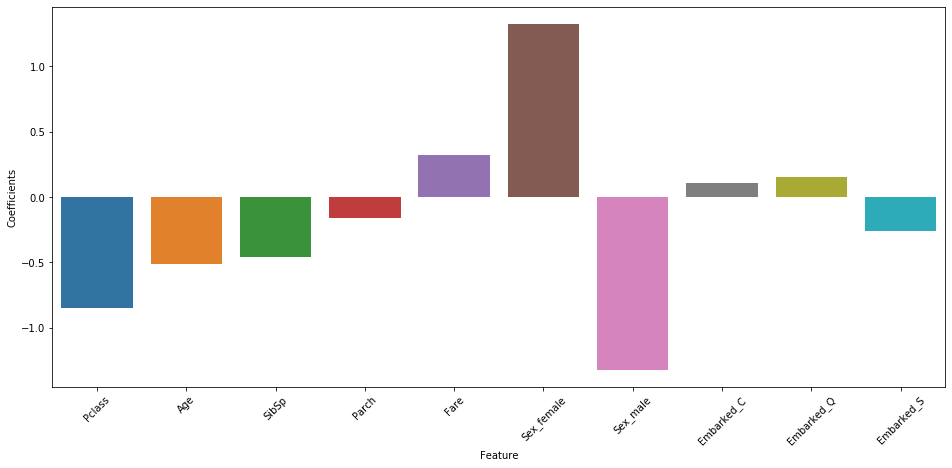

In [187]:
plt.figure(figsize=(16, 7))
sns.barplot(x='Feature', y='Coefficients', data=feature_importance)
plt.xticks(rotation=45)
plt.show()

### Let's have a look at ROC curve

In [197]:
from sklearn.metrics import roc_curve, auc

In [202]:
probs = modelLR.predict_proba(X_test)
probs = probs[:, 1]

In [206]:
fpr, tpr, threshold = roc_curve(y_test, probs, pos_label=1)

In [207]:
print("AUC:", auc(fpr, tpr))

AUC: 0.8570833333333334


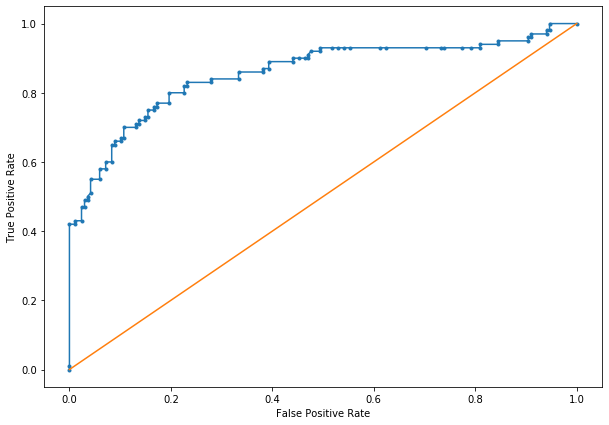

In [208]:
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, marker='.')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1])
# show the plot
plt.show()

In [212]:
i = np.arange(len(tpr))
roc = pd.DataFrame({'tf': pd.Series(tpr-(1-fpr), index=i), 'threshold': pd.Series(threshold, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
print('Best thresh:', list(roc_t['threshold']))

Best thresh: [0.329988328719691]


In [230]:
#def preds_by_thresh(prob_vec, thresh):
#thresh = 0.329988328719691
thresh = 0.329988328719691
preds = []
for proba in probs:
    if proba >= thresh:
        preds.append(1)
    else:
        preds.append(0)

In [231]:
accuracy_score(y_test, preds)
# 0.8022388059701493 -- thresh obtained from ROC analysis
# 0.8059701492537313 -- thresh = 0.5

0.8022388059701493

In [232]:
f1_score(y_test, preds)
# 0.7511737089201878 -- comments as above!
# 0.7373737373737373 

0.7511737089201878

In [233]:
confusion_matrix(y_test, preds)

array([[135,  33],
       [ 20,  80]])

In [228]:
"""
    The thresh above was estimated using X_test and y_test (i.e. VALIDATION SET)
    How do we know that the same thresh will result in the
    same acc and f1-score when applied in REAL test set???
    there is only one way: TRY IT!
"""

'\n    The thresh above was estimated using X_test and y_test (i.e. VALIDATION SET)\n    How do we know that the same thresh will result in the\n    same acc and f1-score when applied in REAL test set???\n'